In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=sio.loadmat("./features_2015.mat")

In [3]:
pdata=data['pdata']

In [4]:
material=pdata[:,3]

In [5]:
pdata_AC=pdata[material==2]

In [6]:
pdata_AC=pdata_AC[:,(0,1,6)]

In [7]:
pdata_AC.shape

(178007, 3)

In [8]:
#pdata_AC=pdata_AC.astype(np.int32)

In [9]:
AC=pd.DataFrame(pdata_AC, columns=['sgan','laid_year','length'])

In [10]:
AC.head()

,sgan,laid_year,length
0,2905098.0,1974.0,183.779848
1,9260735.0,1952.0,115.644669
2,9260774.0,1963.0,11.702646
3,2470112.0,1953.0,183.648820
4,2467340.0,1947.0,185.633048


In [11]:
AC.shape

(178007, 3)

In [12]:
faildata=sio.loadmat("./pfail1512.mat")

In [13]:
fail=pd.DataFrame(faildata['pfail1512'][:,(0,3)],columns=['sgan','fail_year'])

In [14]:
fail.head()

,sgan,fail_year
0,2614254,2000
1,2482317,2000
2,2617953,2000
3,2464350,2000
4,2520542,2000


In [15]:
AC_age=pd.DataFrame(np.array(2000-AC['laid_year']),columns=['observe_age'])

In [16]:
AC_age['age']=np.array(2016-AC['laid_year'])

In [17]:
AC_age=pd.concat([AC,AC_age],axis=1)

In [18]:
AC_age.sort_values(by=['age']).head()

,sgan,laid_year,length,observe_age,age
126463,10726905.0,2014.0,1.499751,-14.0,2.0
126496,10723871.0,2014.0,1.499802,-14.0,2.0
71575,10696867.0,2014.0,3.999927,-14.0,2.0
71576,10696866.0,2014.0,3.998707,-14.0,2.0
137667,10684080.0,2014.0,4.016837,-14.0,2.0


In [19]:
AC_age.shape

(178007, 5)

In [20]:
AC_full=pd.merge(fail, AC, how='inner', on=['sgan'])

In [21]:
AC_full.sort_values(by=['laid_year', 'fail_year']).head()

,sgan,fail_year,laid_year,length
31592,2691564,2003,1884.0,193.561689
31593,2691564,2004,1884.0,193.561689
31594,2691564,2006,1884.0,193.561689
31595,2691564,2013,1884.0,193.561689
38433,8984818,2004,1887.0,298.411634


In [22]:
AC_full['fail_age']=AC_full['fail_year']-AC_full['laid_year']

In [23]:
AC_full=AC_full.sort_values(by=['laid_year','fail_age'])

In [24]:
AC_full.head()

,sgan,fail_year,laid_year,length,fail_age
31592,2691564,2003,1884.0,193.561689,119.0
31593,2691564,2004,1884.0,193.561689,120.0
31594,2691564,2006,1884.0,193.561689,122.0
31595,2691564,2013,1884.0,193.561689,129.0
38433,8984818,2004,1887.0,298.411634,117.0


In [28]:
age_failure_counts=[]
rng_i=list(np.unique(AC_full['laid_year']))
for i in rng_i:
    AC_full_laid_year=AC_full.ix[AC_full['laid_year']==i]
    length_sum=AC_full_laid_year['length'].sum()
    age_failure_count=[]
    rng_j=list(np.unique(AC_full_laid_year['fail_age']))
    for j in rng_j:
        count=len(AC_full_laid_year.ix[AC_full_laid_year['fail_age']==j])
        age_failure_count.append([j,count/length_sum*10000000/len(AC_full.ix[AC_full['fail_year']==(j+i)])])
        #age_failure_count.append([j,count/length_sum*100000])
    age_failure_counts.append(age_failure_count)

In [33]:
len(age_failure_counts) #all the age and failure rate

94

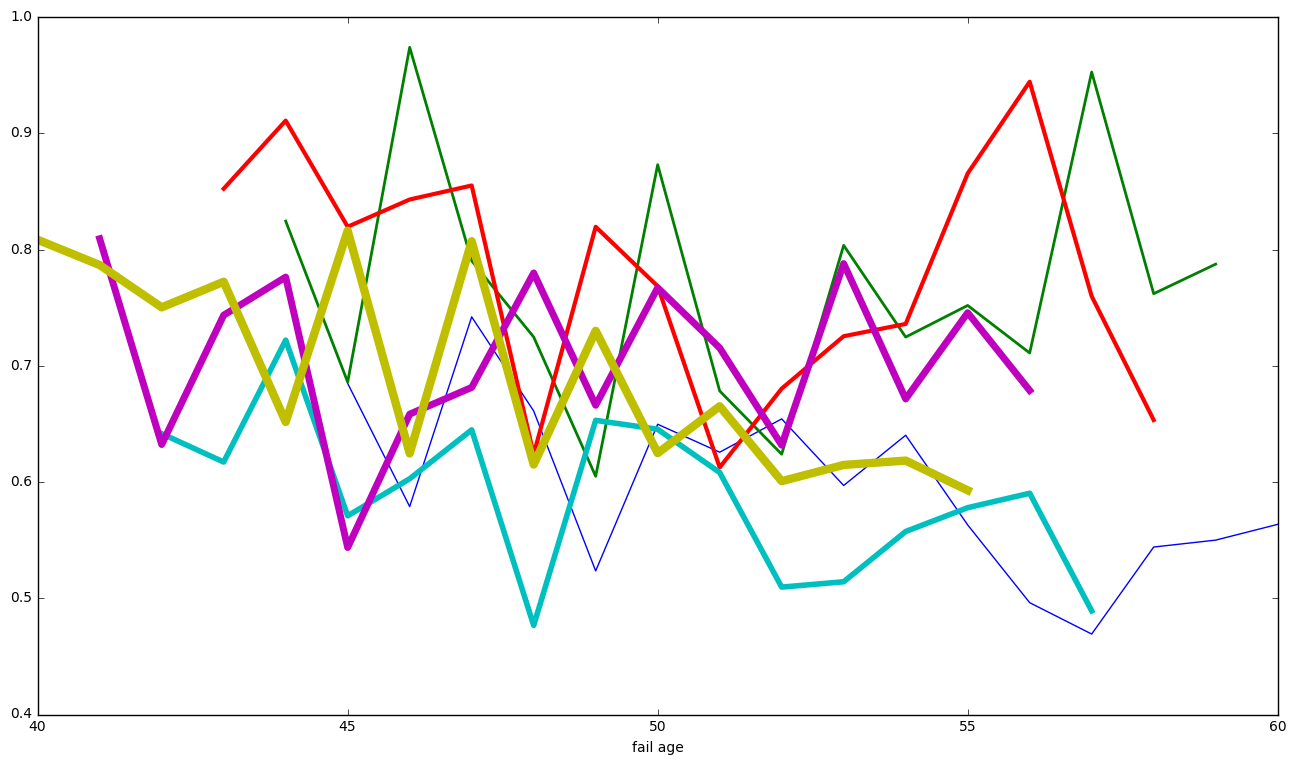

In [91]:
def fail_number_age(year_count):
    year_count_arr=np.array(year_count)
    fig=plt.figure(figsize=(16,9))
    ax1=fig.add_subplot(1,1,1)
    width=0
    temp1=[]
    for series in range(len(year_count_arr)):
        temp=np.array(year_count_arr[series])
        if (temp[0,0]>=40) & (temp[len(temp)-1,0]<=60):
            width+=1
            ax1.plot(temp[:,0],temp[:,1],linewidth=(width))
            temp1.append(temp)
    ax1.set_xlabel('fail age')
        #plt.legend(loc='upper left', bbox_to_anchor=(0.03,0.9))
    plt.tight_layout
    temp1=np.array(temp1)
    return temp1
temp1=fail_number_age(age_failure_counts)

In [92]:
def takeout_overlap(year_count):
    start=max(year_count[:,0,0])
    end=min(year_count[:,year_count.shape[1]-1,0])
    year_count_new=year_count[(year_count[:,:,0]>=start) & (year_count[:,:,0]<=end)]
    return year_count_new
temp2=takeout_overlap(temp1)

In [93]:
temp2

array([[ 45.        ,   0.6847855 ],
       [ 46.        ,   0.57886864],
       [ 47.        ,   0.74205748],
       [ 48.        ,   0.6610974 ],
       [ 49.        ,   0.52351303],
       [ 50.        ,   0.64967458],
       [ 51.        ,   0.62563905],
       [ 52.        ,   0.654276  ],
       [ 53.        ,   0.59701735],
       [ 54.        ,   0.64023317],
       [ 55.        ,   0.56308579],
       [ 45.        ,   0.68598412],
       [ 46.        ,   0.97392456],
       [ 47.        ,   0.79027837],
       [ 48.        ,   0.7247246 ],
       [ 49.        ,   0.60490443],
       [ 50.        ,   0.87293968],
       [ 51.        ,   0.67834331],
       [ 52.        ,   0.62390398],
       [ 53.        ,   0.80355505],
       [ 54.        ,   0.7246732 ],
       [ 55.        ,   0.7518761 ],
       [ 45.        ,   0.81958304],
       [ 46.        ,   0.8430084 ],
       [ 47.        ,   0.85506087],
       [ 48.        ,   0.62382712],
       [ 49.        ,   0.81951524],
 

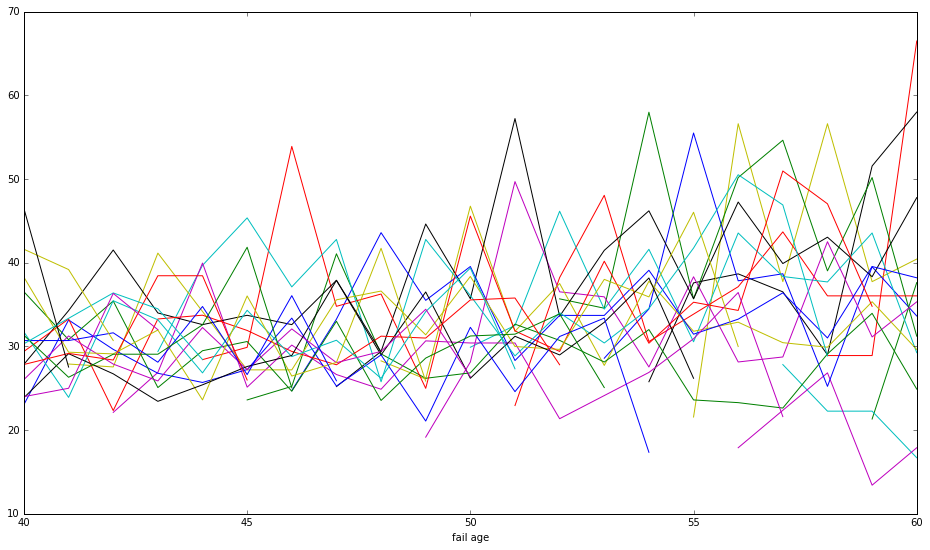

In [175]:
def fail_number_age(year_count):
    year_count_arr=np.array(year_count)
    fig=plt.figure(figsize=(16,9))
    ax1=fig.add_subplot(1,1,1)
    for series in range(len(year_count_arr)-1):
        temp=np.array(year_count_arr[series])
        temp1=[]
        for i in range(len(temp)):
            if (temp[i,0]>=40) & (temp[i,0]<=60):
                temp1.append(list(temp[i]))
        temp1_arr=np.array(temp1)
        if len(temp1_arr)!=0:
            ax1.plot(temp1_arr[:,0],temp1_arr[:,1])
    ax1.set_xlabel('fail age')
        #plt.legend(loc='upper left', bbox_to_anchor=(0.03,0.9))
    plt.tight_layout
fail_number_age(age_failure_counts)

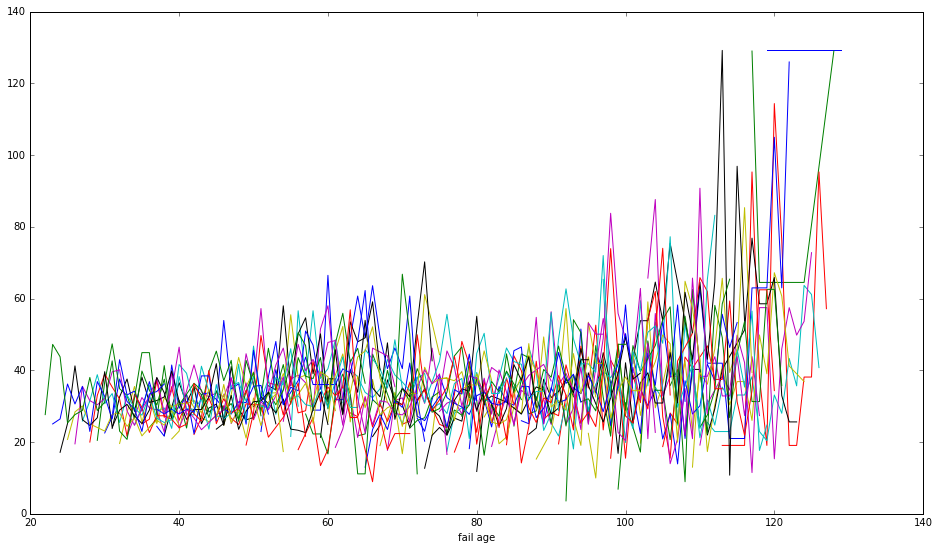

In [174]:
def fail_number_age(year_count):
    year_count_arr=np.array(year_count)
    fig=plt.figure(figsize=(16,9))
    ax1=fig.add_subplot(1,1,1)
    for series in range(len(year_count_arr)-1):
        temp=np.array(year_count_arr[series])
        ax1.plot(temp[:,0],temp[:,1])
    ax1.set_xlabel('fail age')
        #plt.legend(loc='upper left', bbox_to_anchor=(0.03,0.9))
    plt.tight_layout
    #return year_count
fail_number_age(age_failure_counts)